___

<center><h1>Supply Chain Analysis</h1></center>

___

<center><h2>DSM020 - Data Programming in Python</h2></center><br>
<center><strong>Teacher:</strong> Sean McGrath </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presented by:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>
<center style="color: #AA6373; font-weight: 400;">Student Number: 240323983</center>
<center style="color: #AA6373; font-weight: 400;">Student Portal Username: JEFL1</center>
<center>September 2024</center>
<p></p>

## 1. Introduction & Problem Statement
<p></p>
This project aims to predict late delivery risks in global supply chains by analyzing historical data from various markets, shipping modes, and customer segments. Using advanced data processing and machine learning techniques, we seek to uncover the key drivers of delivery delays and propose strategies to optimize logistics performance.

We address the following key questions:

1. What are the primary factors influencing late deliveries across markets and shipping methods?
2. How can predictive models improve delivery accuracy and reduce delays?
3. What data-driven strategies can enhance overall supply chain efficiency?

By leveraging detailed data on orders, customers, and shipments, this analysis develops adaptive models to predict delivery risks and offers actionable insights for improving supply chain reliability and operational effectiveness.

The complete analysis, including the dataset and Jupyter Notebook, will be version-controlled and hosted on GitHub for easy access and collaboration. You can view and contribute to the project at the following URL: https://github.com/jforeroluque/Supply_Chain_Analysis.

<p></p>


### Project background and Context
<p></p>
This project aims to address the challenges of late deliveries in global supply chains by leveraging real-time analytics and machine learning models. The growing complexity of supply chain operations across markets and shipping modes necessitates advanced analytical techniques to enhance visibility and minimize delays.

The analysis focuses on two key hypotheses: first, that real-time data analytics can significantly improve supply chain visibility and reduce delivery delays; and second, that certain factors within the supply chain—such as shipping mode, market region, and product categories—contribute to the likelihood of delays. Using machine learning models, particularly Random Forest, we explore these relationships to identify actionable insights for optimizing logistics and improving customer satisfaction.

Through this approach, we aim to provide data-driven strategies that enhance supply chain efficiency and reduce operational risks by predicting and mitigating late deliveries.
<p></p>

### Aims and Objectives
<p></p>
The primary aim of this project is to enhance supply chain visibility and reduce late deliveries by applying real-time analytics and machine learning models. We seek to identify key factors contributing to delivery delays, such as shipping modes, market regions, and product characteristics, and provide actionable insights that can improve operational efficiency and customer satisfaction.
<p></p>

#### Objectives
<p></p>

1. Identify both obvious and hidden patterns in the data using innovative visualization and clustering techniques to reveal insights into delivery risks.
2. Develop ensemble models that adapt to dynamic supply chain conditions, using real-time trends to improve prediction accuracy.
3. Offer data-driven recommendations for optimizing shipping and operations based on predictive insights to reduce delivery risks in real-time.
4. Design a feedback loop for model retraining using new data to enhance prediction accuracy and adapt to evolving supply chain dynamics.
5. Leverage insights to drive improvements not just in delivery times, but across inventory, customer satisfaction, and operational efficiency.
<p></p>

#### Ethical Considerations
<p></p>
Several ethical considerations were taken into account during the analysis:

1. Data Privacy: Although the dataset does not include personally identifiable information (PII), all customer-related data was handled responsibly to ensure privacy and confidentiality. Measures were taken to anonymize any sensitive data.
2. Transparency and Reproducibility: All steps of the analysis, from data preprocessing to model development, were documented clearly to ensure transparency and reproducibility. This enables other analysts to replicate the analysis and verify the results.
3. Bias in Predictions: Predictive models can sometimes introduce or reinforce bias, particularly if the data contains underlying biases (e.g., regional disparities). We made efforts to ensure the fairness of the models by carefully analyzing feature importance and ensuring balanced evaluation metrics.

In [1]:
# Common Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Testing and Evaluation
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
import unittest

## 2. Data Understanding

In this phase, we collect, describe, and explore the dataset to gain insights into its structure and key attributes. For this project, we used publicly available data sourced from open data platforms [1]. The dataset was chosen based on the specific requirements outlined by the course instructor, ensuring relevance to the project’s objectives and the analysis of late delivery risks.
For this project, we utilized a comprehensive supply chain dataset that includes order information, customer details, and shipping data. The dataset supports the quantitative testing of our hypotheses related to late deliveries and supply chain efficiency, with a focus on enhancing real-time visibility and identifying key factors that influence delivery performance.

### Rationale for Data Selection
We selected this dataset to provide a robust foundation for analyzing late delivery risks across various markets and shipping modes. The dataset captures essential variables, enabling us to:

1. Identify Critical Factors: By including shipping details, customer segments, geographical markets, and product categories, we can uncover factors that contribute to delivery delays and operational inefficiencies.
2. Improve Predictive Accuracy: Using a rich dataset with a broad range of variables allows us to build predictive models that accurately forecast delivery risks, providing actionable insights for real-time operations.
3. Enable Comprehensive Analysis: The dataset supports the analysis of patterns across different markets and shipping modes, enabling us to propose targeted strategies for reducing late deliveries.
4. Support Hypothesis Testing: The data allows us to evaluate our two core hypotheses regarding supply chain visibility and the impact of product categories, order sizes, and discounts on delivery performance.

### Data Utilized
The dataset utilized for this project contains several key variables:

- Shipping Information: Includes shipping modes, shipment dates, and delivery statuses, providing insight into the logistics of the supply chain.
- Order Details: Contains information such as order sizes, order dates, and product categories, which are essential for identifying the likelihood of late deliveries.
- Customer Data: Includes geographical regions, market segments, and customer types, helping us understand the impact of different customer profiles on delivery performance.
- Delivery Outcomes: Variables related to delivery times, late deliveries, and delivery risks, which are crucial for building predictive models and evaluating performance.

These variables allow us to explore the relationships between shipping modes, market regions, and product categories, helping us identify key drivers of delivery delays.

### Limitations and constrains of the Data

While the dataset provides comprehensive information for the analysis, there are several limitations and constraints to consider:

1. Incomplete Data: Some records may have missing values, particularly in fields related to delivery times or customer details. This could impact the accuracy of the models and the analysis, although preprocessing steps were taken to handle missing data.
2. Categorical Data Complexity: Variables such as shipping modes and market regions are categorical in nature, requiring encoding into numerical values for machine learning models. This transformation may introduce some bias or oversimplification in the analysis.
3. Timeframe of Data: The data may not fully capture recent shifts in supply chain strategies or external factors (e.g., economic changes or pandemic-related disruptions) that could influence delivery performance.

### Features explanation 

|Feature| Explanation|
|:-:|:---|
|Type| Type of transaction made
|Days for shipping (real)| Actual shipping days of the purchased product
|Days for shipment (scheduled)| Days of scheduled delivery of the purchased product
|Benefit per order| Earnings per order placed
|Sales per customer| Total sales per customer made per customer
|Delivery Status| Delivery status of orders| Advance shipping , Late delivery , Shipping canceled , Shipping on tim...
|Late_delivery_risk| Categorical variable that indicates if sending is late (1), it is not late (0).
|Category Id| Product category code
|Category Name| Description of the product category
|Customer City| City where the customer made the purchase
|Customer Country| Country where the customer made the purchase
|Customer Email| Customer's email
|Customer Fname| Customer name
|Customer Id| Customer ID
|Customer Lname| Customer lastname
|Customer Password| Masked customer key
|Customer Segment| Types of Customers| Consumer , Corporate , Home Office
|Customer State| State to which the store where the purchase is registered belongs
|Customer Street| Street to which the store where the purchase is registered belongs
|Customer Zipcode| Customer Zipcode
|Department Id| Department code of store
|Department Name| Department name of store
|Latitude| Latitude corresponding to location of store
|Longitude| Longitude corresponding to location of store
|Market| Market to where the order is delivered | Africa , Europe , LATAM , Pacific Asia , USCA
|Order City| Destination city of the order
|Order Country| Destination country of the order
|Order Customer Id| Customer order code
|order date (DateOrders)| Date on which the order is made
|Order Id| Order code
|Order Item Cardprod Id| Product code generated through the RFID reader
|Order Item Discount| Order item discount value
|Order Item Discount Rate| Order item discount percentage
|Order Item Id| Order item code
|Order Item Product Price| Price of products without discount
|Order Item Profit Ratio| Order Item Profit Ratio
|Order Item Quantity| Number of products per order
|Sales| Value in sales
|Order Item Total| Total amount per order
|Order Profit Per Order| Order Profit Per Order
|Order Region| Region of the world where the order is delivered | Southeast Asia ,South Asia ,Oceania ,Eastern ...
|Order State| State of the region where the order is delivered
|Order Status| Order Status | COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FR...
|Product Card Id| Product code
|Product Category Id| Product category code
|Product Description| Product Description
|Product Image| Link of visit and purchase of the product
|Product Name| Product Name
|Product Price| Product Price
|Product Status| Status of the product stock |If it is 1 not available , 0 the product is available
|Shipping date (DateOrders)| Exact date and time of shipment
|Shipping Mode| The following shipping modes are presented | Standard Class , First Class , Second Class , Same D..."

### Data Load

In [75]:
# Using the address for the .csv file from the GitHub repository
url = 'https://raw.githubusercontent.com/jforeroluque/Supply_Chain_Analysis/main/DataCoSupplyChainDataset.csv'

# Load the CSV file into a DataFrame, specifying the encoding - this is because of an issue in the loading of the dataset
try:
    df_supply = pd.read_csv(url, encoding='ISO-8859-1', on_bad_lines='skip')
except FileNotFoundError:
    print("Error: File not found at the specified URL.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the DataFrame
df_supply.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


##### Note:
Ensure that saving the output file doesn't overwrite existing files. If necessary, implement file existence checks before saving.

In [73]:
print(df_supply.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Exploratory Data Analysis [1] [2]

#### Volume of the data

In [4]:
# Here we count the records and the features to understand the dataset size
num_records = len(df_supply)
num_features = len(df_supply.columns)

print(f"The dataset has {num_records} records and {num_features} features.")

The dataset has 180519 records and 53 features.


In [77]:
# Basic data exploration
print("Shape of the dataset:", df_supply.shape)
print("Data types:", df_supply.dtypes)
print("Missing values in each column:", df_supply.isnull().sum())
df_supply.describe()

Shape of the dataset: (180519, 53)
Data types: Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude 

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


#### Missing Values

To ensure the integrity of the analysis, we will drop rows with missing values in key features that are critical to the predictive models and overall insights. By focusing on the most relevant variables, we minimize the impact of incomplete data while preserving the quality and accuracy of the analysis. [3]

In [5]:
# Dropping rows with missing values in critical columns
df_cleaned = df_supply.dropna(subset=[
    "Late_delivery_risk",
    "Order Item Product Price",
    "Order Item Quantity",
    "Days for shipment (scheduled)",
    "Days for shipping (real)",
    "Customer Segment",
    "Order Country",
    "Shipping Mode"
])

# Show the first 5 rows of cleaned data
df_cleaned.head(5)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Removing Unnecessary Columns

We remove columns that do not contribute to the analysis or predictive models. By eliminating these irrelevant features, we streamline the dataset, reduce noise, and improve the efficiency of the data processing pipeline.


In [6]:
# List of columns to drop
columns_to_drop = ['Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password','Customer Street', 'Customer Zipcode', 'Product Description', 'Product Image', 'Order Zipcode', 'Customer Email']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the first few rows to confirm
df_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Data Preprocessing Test

This test ensures that the preprocessing steps work correctly.

In [7]:
class TestDataPreprocessing(unittest.TestCase):
    def setUp(self):
        # Sample DataFrame simulating df_supply
        self.df_supply = pd.DataFrame({
            'Late_delivery_risk': [1, np.nan, 0, 1, 0],
            'Order Item Product Price': [100.0, 200.0, np.nan, 300.0, 150.0],
            'Order Item Quantity': [2, 4, 5, np.nan, 6],
            'Days for shipment (scheduled)': [5, 10, 15, 20, np.nan],
            'Days for shipping (real)': [4, np.nan, 10, 12, 14],
            'Customer Segment': ['Consumer', 'Corporate', np.nan, 'Home Office', 'Corporate'],
            'Order Country': ['US', 'Germany', 'Brazil', 'France', np.nan],
            'Shipping Mode': ['Standard Class', 'First Class', 'Second Class', np.nan, 'First Class'],
            'Customer Fname': ['John', 'Jane', 'Alice', 'Bob', 'Charlie'],
            'Customer Id': [1, 2, 3, 4, 5],
            'Customer Lname': ['Doe', 'Smith', 'Johnson', 'Brown', 'Taylor'],
            'Customer Password': ['pass1', 'pass2', 'pass3', 'pass4', 'pass5'],
            'Customer Street': ['Street1', 'Street2', 'Street3', 'Street4', 'Street5'],
            'Customer Zipcode': ['10001', '20002', '30003', '40004', '50005'],
            'Product Description': ['Product1', 'Product2', 'Product3', 'Product4', 'Product5'],
            'Product Image': ['img1', 'img2', 'img3', 'img4', 'img5'],
            'Customer Email': ['email1', 'email2', 'email3', 'email4', 'email5'],
            'Order Zipcode': ['10001', '20002', '30003', '40004', '50005'],
        })

    def test_dropna_critical_columns(self):
        # Apply dropna for critical columns
        critical_columns = [
            "Late_delivery_risk",
            "Order Item Product Price",
            "Order Item Quantity",
            "Days for shipment (scheduled)",
            "Days for shipping (real)",
            "Customer Segment",
            "Order Country",
            "Shipping Mode"
        ]
        df_cleaned = self.df_supply.dropna(subset=critical_columns)

        # Check that no rows have missing values in critical columns
        for col in critical_columns:
            self.assertEqual(df_cleaned[col].isnull().sum(), 0, f"Missing values found in {col}")

    def test_drop_unnecessary_columns(self):
        # List of columns to drop
        columns_to_drop = ['Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password','Customer Street', 'Customer Zipcode', 'Product Description', 'Product Image', 'Order Zipcode', 'Customer Email']

        # Apply the drop operation
        df_cleaned = self.df_supply.drop(columns=columns_to_drop)

        # Test that the unnecessary columns are dropped
        for col in columns_to_drop:
            self.assertNotIn(col, df_cleaned.columns, f"{col} was not dropped")

# Run the test in Jupyter
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


#### Numerical Feature Summary

In [8]:
# Summary statistics
df_cleaned.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Department Id,Latitude,Longitude,Order Customer Id,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,5.443460,29.719955,-84.915675,6691.379495,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,1.629246,9.813646,21.433241,4162.918106,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,2.000000,-33.937553,-158.025986,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,4.000000,18.265432,-98.446312,3258.500000,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,5.000000,33.144863,-76.847908,6457.000000,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,7.000000,39.279617,-66.370583,9779.000000,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,12.000000,48.781933,115.263077,20757.000000,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


#### Categorical Feature Summary

Here we assess the distribution of values across categorical features and identifying missing data

In [9]:
# Set the count to distinct values in each categorical feature
for col_name in ['Shipping Mode', 'Order Region', 'Order Country', 'Product Category Id', 'Customer Segment', 'Order Status', 'Market']:
    print(f"\nDistinct counts for {col_name}:")
    print(df_cleaned[col_name].value_counts())



Distinct counts for Shipping Mode:
Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

Distinct counts for Order Region:
Order Region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: count, dtype: int64

Distinct counts for Order Country:
Order Country
Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia        

In [10]:
# Count the number of missing values in each column to be sure
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Pric

#### Class Imbalance Analysis

Here we determine the distribution of the target feature "Late Delivery Risk" where we want to assess class imbalance that is a critical factor to implement Machine Learning Models

In [11]:
# Count the number of occurrences for each class in 'Late_delivery_risk'
late_delivery_counts = df_cleaned['Late_delivery_risk'].value_counts()

# Display the counts
print("Count of occurrences for each class in 'Late_delivery_risk':")
print(late_delivery_counts)

Count of occurrences for each class in 'Late_delivery_risk':
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


In [12]:
# Calculate the total number of records
total_count = len(df_cleaned)

# Calculate the percentage distribution
late_delivery_percentage = (late_delivery_counts / total_count) * 100

# Combine counts and percentages into a DataFrame
late_delivery_distribution = pd.DataFrame({
    'count': late_delivery_counts,
    'percentage': late_delivery_percentage
})

# Display the distribution
print("\nDistribution in terms of percentages:")
late_delivery_distribution


Distribution in terms of percentages:


,count,percentage
Late_delivery_risk,,
1,98977,54.829132
0,81542,45.170868


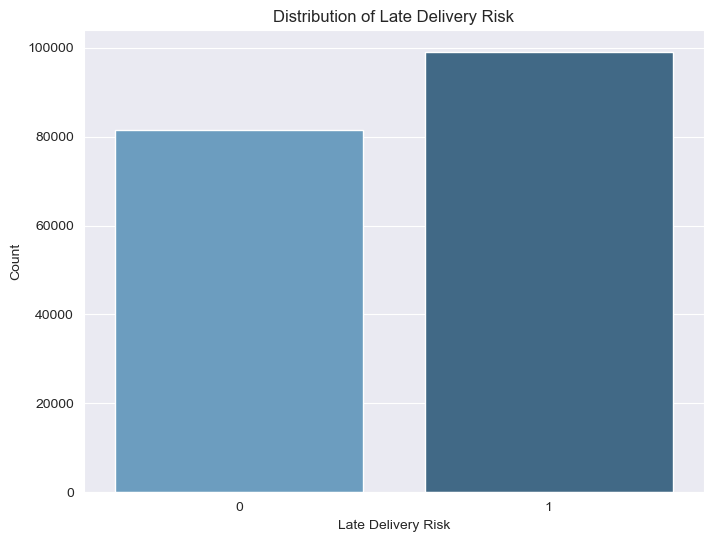

In [13]:
 # Count occurrences of 'Late_delivery_risk' using pandas
late_delivery_risk_df = df_cleaned.groupby("Late_delivery_risk").size().reset_index(name='count')

# Plot Late Delivery Risk using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Late_delivery_risk', y='count', hue='Late_delivery_risk', data=late_delivery_risk_df, palette='Blues_d', legend=False)
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.title('Distribution of Late Delivery Risk')
plt.show()

##### Analysis of the Imbalance
Since the distribution is somewhat balanced with a higher count for class 1 (Late Delivery Risk) ensures that the models will sufficient examples from both classes to learn from. Nevertheless we will be using cross validation to see the effect of a better balance in the distribution.

#### Correlation Analysis (Numerical Features)

Here we try to understand and identify the strength and direction of relationships between the numerical features and the target variable "Late Delivery Risk".

In [14]:
# List of numerical columns to calculate the correlation with 'Late_delivery_risk'
numerical_columns_corr = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total', 'Order Item Discount Rate', 'Order Item Product Price', 'Benefit per order', 'Order Profit Per Order', 'Sales per customer', 'Order Item Profit Ratio', 'Product Price', 'Order Item Discount', 'Latitude', 'Longitude', 'Sales', 'Product Category Id']

# Ensure 'Late_delivery_risk' is numeric for correlation (if needed)
df_cleaned['Late_delivery_risk'] = pd.to_numeric(df_cleaned['Late_delivery_risk'], errors='coerce')

# Calculate and print the correlation for each numerical column with 'Late_delivery_risk'
for col_name in numerical_columns_corr:
    correlation = df_cleaned[[col_name, 'Late_delivery_risk']].corr().iloc[0, 1]
    print(f"Correlation between {col_name} and Late_delivery_risk: {correlation}")

Correlation between Days for shipment (scheduled) and Late_delivery_risk: -0.3693517719633493
Correlation between Order Item Quantity and Late_delivery_risk: -0.00013923280125116905
Correlation between Order Item Total and Late_delivery_risk: -0.0037912615226316356
Correlation between Order Item Discount Rate and Late_delivery_risk: 0.0004042979798693423
Correlation between Order Item Product Price and Late_delivery_risk: -0.002175249056545577
Correlation between Benefit per order and Late_delivery_risk: -0.003726996128801655
Correlation between Order Profit Per Order and Late_delivery_risk: -0.003726996128801655
Correlation between Sales per customer and Late_delivery_risk: -0.0037912615226316356
Correlation between Order Item Profit Ratio and Late_delivery_risk: -0.0023155010812578626
Correlation between Product Price and Late_delivery_risk: -0.002175249056545577
Correlation between Order Item Discount and Late_delivery_risk: -0.0007499082512330009
Correlation between Latitude and La

##### Analysis of results
Here we see that the individual linear correlation between the features and the target variable is weak, but this indicate us that there could be a non-linear relationship with those features and teh categorical features as well, machine learning models such as Random Forest can capture complex non-linear interactions between features. 

#### Shipping mode Analysis

This analysis would enable to evaluate the Shipping mode performance by looking at how frequently late daliveries occur for each shipping method. With this the company can determine which shipping methods may require optimization or further investigation to reduce late deliveries.

In [15]:
# Group by 'Shipping Mode' and calculate the number of late deliveries and total deliveries
shipping_mode_analysis = df_cleaned.groupby('Shipping Mode').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries for each shipping mode
shipping_mode_analysis['Late_Delivery_Percentage'] = (shipping_mode_analysis['Late_Delivery_Count'] / shipping_mode_analysis['Total_Deliveries']) * 100

# Display the result
shipping_mode_analysis

,Shipping Mode,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
0,First Class,26513,27814,95.322499
1,Same Day,4454,9737,45.743042
2,Second Class,26987,35216,76.632781
3,Standard Class,41023,107752,38.071683


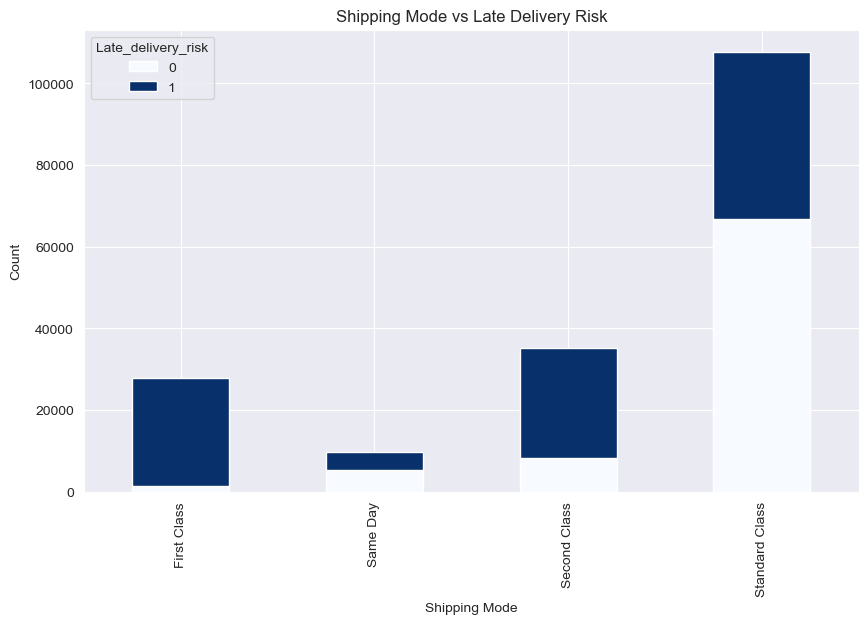

In [16]:
# Count occurrences of 'Shipping Mode' and 'Late_delivery_risk' using pandas
shipping_mode_df = df_cleaned.groupby(["Shipping Mode", "Late_delivery_risk"]).size().reset_index(name='count')

# Create a pivot table for visualization
shipping_mode_pivot = shipping_mode_df.pivot(index='Shipping Mode', columns='Late_delivery_risk', values='count')

# Plot Shipping Mode vs Late Delivery using seaborn
shipping_mode_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title("Shipping Mode vs Late Delivery Risk")
plt.ylabel("Count")
plt.show()

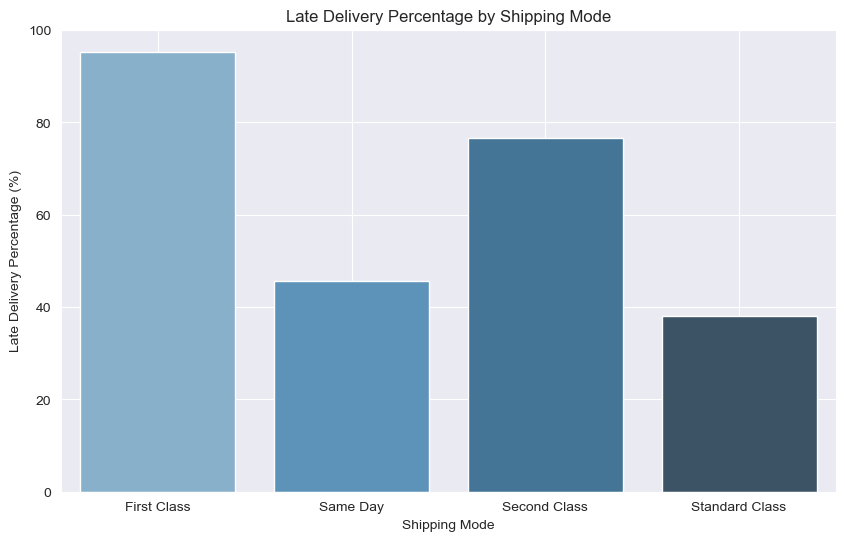

In [17]:
# Set up the figure size
plt.figure(figsize=(10, 6))

sns.barplot(x="Shipping Mode", y="Late_Delivery_Percentage", hue='Shipping Mode', data=shipping_mode_analysis, palette='Blues_d')

plt.xlabel('Shipping Mode')
plt.ylabel('Late Delivery Percentage (%)')
plt.title('Late Delivery Percentage by Shipping Mode')
plt.grid(True)

# Show the plot
plt.show()

##### Analysis
First Class has the highest percentage of late deliveries (close to 100%), which is unexpected since First Class is typically associated with faster and more reliable shipping. This suggests that there may be operational or logistical challenges affecting First Class deliveries.
Same Day shipping has a much lower late delivery percentage (~40%), suggesting that it is generally more reliable, as expected for expedited shipping.
Second Class has a relatively high percentage of late deliveries (around 75%), which indicates it might not be a good choice for customers who need timely deliveries.
Standard Class, while having the highest count of deliveries, has the lowest percentage of late deliveries (less than 40%), suggesting that Standard Class, despite its volume, performs better in terms of timeliness compared to First Class and Second Class.

#### Geographical Analysis

This analysis evaluates geographical impact on the late deliveries by breaking down the data by Order City, and Order Country. With this the company can understand which regions are experiencing more late deliveries.

In [18]:
# Group by 'Market', 'Order City', and 'Order Country' and calculate late deliveries and total deliveries
geo_analysis = df_cleaned.groupby(['Market', 'Order City', 'Order Country']).agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries
geo_analysis['Late_Delivery_Percentage'] = (geo_analysis['Late_Delivery_Count'] / geo_analysis['Total_Deliveries']) * 100

# Sort by Late_Delivery_Count in descending order
geo_analysis = geo_analysis.sort_values(by='Late_Delivery_Count', ascending=False)

# Display the result without truncation
pd.set_option('display.max_rows', None)  # Ensure all rows are shown
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)  # Adjust display width

# Show the result
geo_analysis.head(10)

,Market,Order City,Order Country,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
3444,USCA,New York City,Estados Unidos,1261,2202,57.266122
2118,LATAM,Santo Domingo,República Dominicana,1217,2211,55.042967
3379,USCA,Los Angeles,Estados Unidos,965,1845,52.303523
2161,LATAM,Tegucigalpa,Honduras,942,1783,52.832305
1917,LATAM,Managua,Nicaragua,925,1682,54.994055
1938,LATAM,Mexico City,México,803,1484,54.110512
2710,Pacific Asia,Manila,Filipinas,766,1381,55.467053
3562,USCA,San Francisco,Estados Unidos,706,1297,54.433308
2097,LATAM,San Salvador,El Salvador,668,1135,58.854626
3493,USCA,Philadelphia,Estados Unidos,657,1302,50.460829


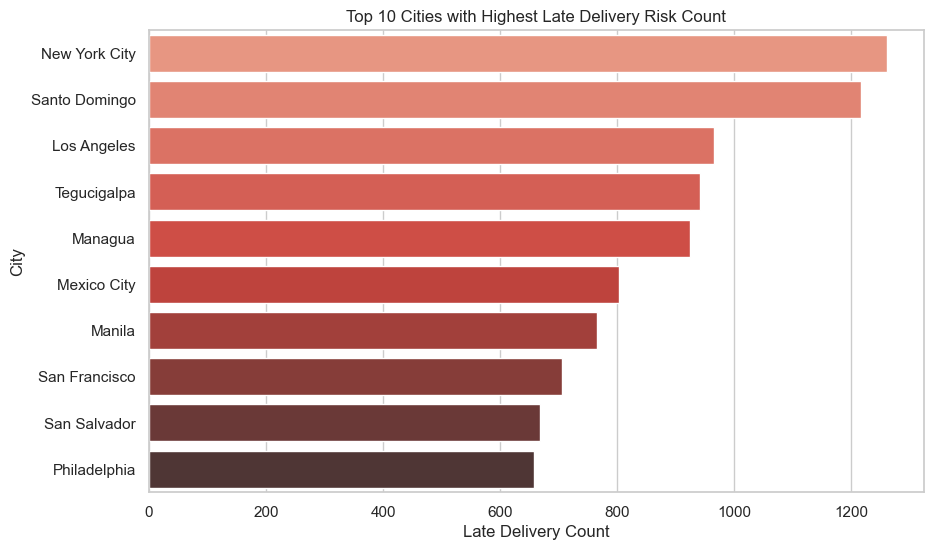

In [19]:
# Set seaborn style
sns.set(style="whitegrid")

# Top 10 Cities by Late Delivery Count
top_cities = geo_analysis.sort_values(by='Late_Delivery_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Late_Delivery_Count', y='Order City', hue='Order City', data=top_cities, palette='Reds_d')
plt.title('Top 10 Cities with Highest Late Delivery Risk Count')
plt.xlabel('Late Delivery Count')
plt.ylabel('City')
plt.show()

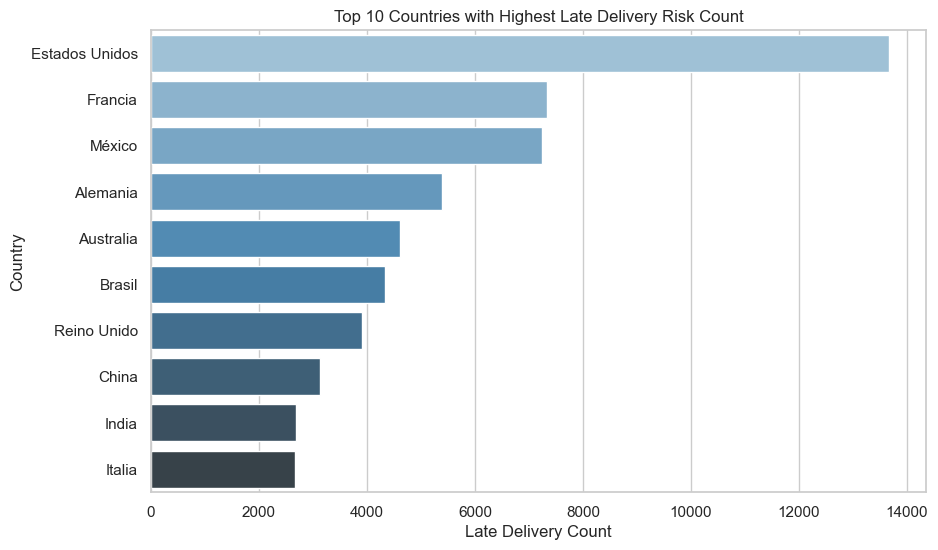

In [20]:
# Top 10 Countries by Late Delivery Count
top_countries = geo_analysis.groupby('Order Country').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_Delivery_Count', aggfunc='sum'),
    Total_Deliveries=pd.NamedAgg(column='Total_Deliveries', aggfunc='sum')
).reset_index()

top_countries = top_countries.sort_values(by='Late_Delivery_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Late_Delivery_Count', y='Order Country', hue='Order Country', data=top_countries, palette='Blues_d')
plt.title('Top 10 Countries with Highest Late Delivery Risk Count')
plt.xlabel('Late Delivery Count')
plt.ylabel('Country')
plt.show()

##### Analysis
Cities like New York City, Santo Domingo, Los Angeles, and Tegucigalpa are leading in terms of late delivery risk.
The United States, France, and Mexico have the highest counts of late deliveries at the country level.
We need to take into account this feature categories in mind to when we analyze the model.

#### Product Category Analysis

Here we evaluate the impact of the product categories on late deliveries. With this we aim to identify which product categories are more prone to late deliveries, offering insights into potential logistical inefficiencies for certain products.

In [21]:
# Group by 'Category Name' and calculate late deliveries and total deliveries
product_category_analysis = df_cleaned.groupby('Category Name').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries for each product category
product_category_analysis['Late_Delivery_Percentage'] = (product_category_analysis['Late_Delivery_Count'] / product_category_analysis['Total_Deliveries']) * 100

# Sort by Late_Delivery_Count in descending order
product_category_analysis = product_category_analysis.sort_values(by='Late_Delivery_Count', ascending=False)

# Display the result
product_category_analysis

,Category Name,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
12,Cleats,13496,24551,54.971284
34,Men's Footwear,12121,22246,54.486200
47,Women's Apparel,11476,21035,54.556691
30,Indoor/Outdoor Games,10565,19298,54.746606
18,Fishing,9516,17325,54.926407
46,Water Sports,8517,15540,54.806950
9,Camping & Hiking,7487,13729,54.534198
10,Cardio Equipment,6805,12487,54.496677
38,Shop By Sport,6058,10984,55.152950
17,Electronics,1770,3156,56.083650


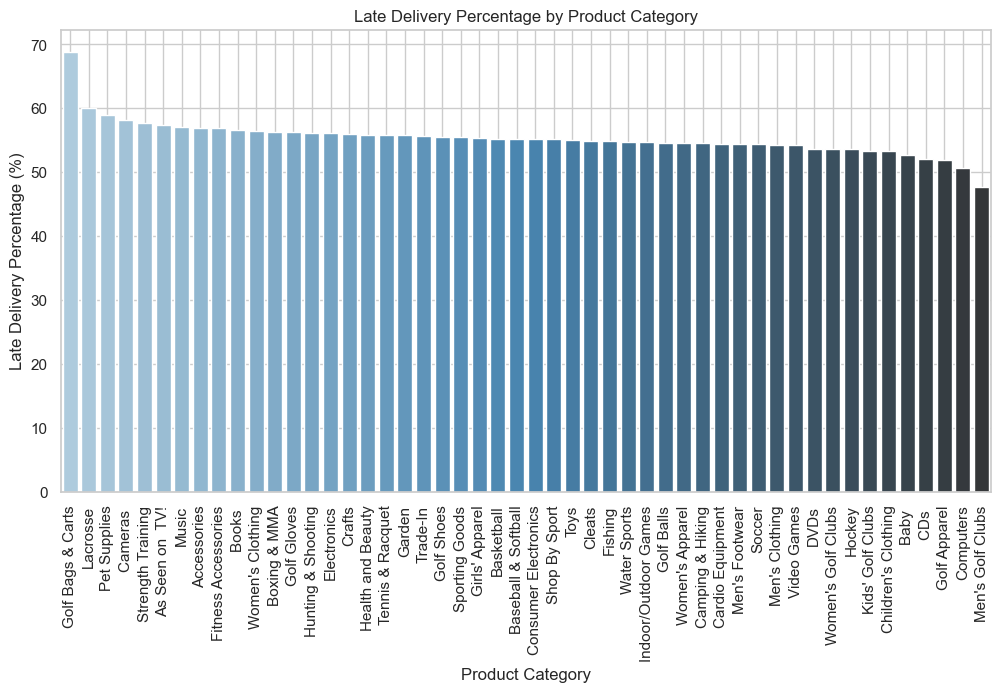

In [22]:
# Sort the data by Late_Delivery_Percentage in descending order
product_category_analysis = product_category_analysis.sort_values(by="Late_Delivery_Percentage", ascending=False)

sns.set(style="whitegrid")

# Create a bar plot using seaborn with hue and palette
plt.figure(figsize=(12, 6))
sns.barplot(x="Category Name", y="Late_Delivery_Percentage", data=product_category_analysis, palette="Blues_d", hue="Category Name")
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Late Delivery Percentage (%)')
plt.title('Late Delivery Percentage by Product Category')
plt.grid(True)

plt.show()

##### Analysis

Top Categories with High Late Delivery Rates: 
- Golf Bags & Carts have the highest late delivery percentage, nearing 70%.
- Lacrosse, Pet Supplies, and Cameras also exhibit high late delivery percentages (over 60%).
- These categories might involve bulky, expensive, or specialized items, which could explain the higher likelihood of delays due to logistical challenges such as longer handling times, availability issues, or complex shipping requirements. 

### 3. Hypothesis 1 - Supply Chain Optimization

"Improved supply chain visibility through real-time analytics reduces the frequency of late deliveries."

Our goal is to leverage real-time analytics to enhance supply chain visibility and reduce the incidence of late deliveries. By analyzing key features such as shipping schedules, order details, and geographical factors, we can develop predictive models to identify the primary drivers of late deliveries and optimize delivery processes accordingly.

We first used LabelEncoder to convert the categorical columns, Market and Shipping Mode, into numerical indices, making them suitable for model processing. Next, we created a new feature, Price per Item, by dividing the total product price by the quantity sold, which helps capture pricing dynamics at the unit level.

Additionally, we generated two interaction terms:

- Days_Market_Interaction: This captures the combined effect of the number of scheduled shipping days and the market region, helping to model regional variations in delivery performance.
- Days_ShippingMode_Interaction: This captures the interaction between scheduled shipping days and shipping modes (e.g., First Class, Standard Class), accounting for the influence of different shipping methods on delivery times.


In [35]:
# Index the 'Market' and 'Shipping Mode' columns
label_encoder_market = LabelEncoder()
label_encoder_shipping_mode = LabelEncoder()

df_cleaned['Market_index'] = label_encoder_market.fit_transform(df_cleaned['Market'])
df_cleaned['Shipping_Mode_index'] = label_encoder_shipping_mode.fit_transform(df_cleaned['Shipping Mode'])


In [36]:
# Feature Engineering: Creating interaction terms and additional features
df_cleaned['Price_per_item'] = df_cleaned['Order Item Product Price'] / df_cleaned['Order Item Quantity']
df_cleaned['Days_Market_Interaction'] = df_cleaned['Days for shipment (scheduled)'] * df_cleaned['Market_index']
df_cleaned['Days_ShippingMode_Interaction'] = df_cleaned['Days for shipment (scheduled)'] * df_cleaned['Shipping_Mode_index']


#### Handling Categorical Features

We use a ColumnTransformer to process both categorical and numerical features. OneHotEncoder is applied to convert categorical variables into numerical binary indicators, while StandardScaler normalizes the numerical features to ensure they are on a similar scale. This ensures that both feature types are transformed appropriately and fed into the model in a single, streamlined step.


In [37]:
# Create a list of categorical and numerical columns
categorical_features_h1 = ['Order Region', 'Order Country', 'Product Category Id', 'Order Status', 'Shipping Mode', 'Customer Segment', 'Market', 'Category Name']
#numeric_features_h1 = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total','Price_per_item', 'Days_Market_Interaction', 'Days_ShippingMode_Interaction', 'Order Item Discount Rate']

numeric_features_h1 = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total', 'Order Item Discount Rate', 'Order Item Product Price', 'Benefit per order', 'Order Profit Per Order', 'Sales per customer', 'Order Item Profit Ratio', 'Product Price', 'Order Item Discount', 'Latitude', 'Longitude', 'Sales']

In [38]:
# We'll use ColumnTransformer to handle both OneHotEncoding and numerical scaling in one pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_h1),  # OneHotEncoder for categorical features
        ('num', StandardScaler(), numeric_features_h1)      # StandardScaler for numerical features
    ]
)


#### Feature Engineering Test
Since we encountered issues with mismatched lengths between feature names and importances when running the Random Forest model, we decided to test the encoding process to ensure it is being applied correctly [4][5]

In [39]:
class TestFeatureEngineeringHypothesis1(unittest.TestCase):
    def setUp(self):
        # Example data setup (use a small sample of data or your actual df_cleaned DataFrame)
        self.df_cleaned = pd.DataFrame({
            'Market': ['APAC', 'EMEA', 'LATAM'],
            'Shipping Mode': ['Standard Class', 'Second Class', 'First Class'],
            'Order Item Product Price': [100, 200, 300],
            'Order Item Quantity': [2, 4, 6],
            'Days for shipment (scheduled)': [5, 10, 15]
        })

        # Initialize LabelEncoders
        self.label_encoder_market = LabelEncoder()
        self.label_encoder_shipping_mode = LabelEncoder()

        # Feature Engineering - Encode categorical features
        self.df_cleaned['Market_index'] = self.label_encoder_market.fit_transform(self.df_cleaned['Market'])
        self.df_cleaned['Shipping_Mode_index'] = self.label_encoder_shipping_mode.fit_transform(self.df_cleaned['Shipping Mode'])

        # Create additional features
        self.df_cleaned['Price_per_item'] = self.df_cleaned['Order Item Product Price'] / self.df_cleaned['Order Item Quantity']
        self.df_cleaned['Days_Market_Interaction'] = self.df_cleaned['Days for shipment (scheduled)'] * self.df_cleaned['Market_index']
        self.df_cleaned['Days_ShippingMode_Interaction'] = self.df_cleaned['Days for shipment (scheduled)'] * self.df_cleaned['Shipping_Mode_index']

        # ColumnTransformer for encoding and scaling
        self.categorical_features_h1 = ['Market', 'Shipping Mode']
        self.numeric_features_h1 = ['Days for shipment (scheduled)', 'Order Item Product Price', 'Order Item Quantity', 'Price_per_item',
                                    'Days_Market_Interaction', 'Days_ShippingMode_Interaction']

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_features_h1),
                ('num', StandardScaler(), self.numeric_features_h1)
            ]
        )

        # Fit the ColumnTransformer to the data
        self.processed_data = self.preprocessor.fit_transform(self.df_cleaned)

    def test_market_index(self):
        """Test if Market_index is correctly encoded."""
        market_mapping = {label: idx for idx, label in enumerate(self.label_encoder_market.classes_)}
        self.assertEqual(self.df_cleaned['Market_index'].iloc[0], market_mapping['APAC'])
        self.assertEqual(self.df_cleaned['Market_index'].iloc[1], market_mapping['EMEA'])
        self.assertEqual(self.df_cleaned['Market_index'].iloc[2], market_mapping['LATAM'])

    def test_shipping_mode_index(self):
        """Test if Shipping_Mode_index is correctly encoded."""
        shipping_mapping = {label: idx for idx, label in enumerate(self.label_encoder_shipping_mode.classes_)}
        self.assertEqual(self.df_cleaned['Shipping_Mode_index'].iloc[0], shipping_mapping['Standard Class'])
        self.assertEqual(self.df_cleaned['Shipping_Mode_index'].iloc[1], shipping_mapping['Second Class'])
        self.assertEqual(self.df_cleaned['Shipping_Mode_index'].iloc[2], shipping_mapping['First Class'])

    def test_price_per_item(self):
        """Test if Price_per_item is calculated correctly."""
        self.assertAlmostEqual(self.df_cleaned['Price_per_item'].iloc[0], 100 / 2)
        self.assertAlmostEqual(self.df_cleaned['Price_per_item'].iloc[1], 200 / 4)
        self.assertAlmostEqual(self.df_cleaned['Price_per_item'].iloc[2], 300 / 6)

    def test_days_market_interaction(self):
        """Test if Days_Market_Interaction is calculated correctly."""
        self.assertAlmostEqual(self.df_cleaned['Days_Market_Interaction'].iloc[0], 5 * self.df_cleaned['Market_index'].iloc[0])
        self.assertAlmostEqual(self.df_cleaned['Days_Market_Interaction'].iloc[1], 10 * self.df_cleaned['Market_index'].iloc[1])
        self.assertAlmostEqual(self.df_cleaned['Days_Market_Interaction'].iloc[2], 15 * self.df_cleaned['Market_index'].iloc[2])

    def test_days_shipping_mode_interaction(self):
        """Test if Days_ShippingMode_Interaction is calculated correctly."""
        self.assertAlmostEqual(self.df_cleaned['Days_ShippingMode_Interaction'].iloc[0], 5 * self.df_cleaned['Shipping_Mode_index'].iloc[0])
        self.assertAlmostEqual(self.df_cleaned['Days_ShippingMode_Interaction'].iloc[1], 10 * self.df_cleaned['Shipping_Mode_index'].iloc[1])
        self.assertAlmostEqual(self.df_cleaned['Days_ShippingMode_Interaction'].iloc[2], 15 * self.df_cleaned['Shipping_Mode_index'].iloc[2])

    def test_column_transformer_output_shape(self):
        """Test that the ColumnTransformer output has the correct shape."""
        # Calculate expected number of columns
        expected_num_columns = len(self.numeric_features_h1) + sum([len(np.unique(self.df_cleaned[col])) for col in self.categorical_features_h1])
        self.assertEqual(self.processed_data.shape[1], expected_num_columns)

# Run the test in Jupyter
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.024s

OK


#### Modeling and Evaluation [6]

##### Model Training

In here we define the Random Forest classifier model, starting with building the pipeline to include the feature processing and the model, then we split the data into training and testing sets, fits the model on the training data, makes predictions and evaluates the model's performance using the Area Under the ROC Curve (AUC) 

In [40]:
# Assemble the final features and define the RandomForest model
rf_Supply = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
# Create a pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_Supply)
])

In [42]:
# Split the data into training and testing sets
X = df_cleaned[categorical_features_h1 + numeric_features_h1 + ['Market_index', 'Shipping_Mode_index']]
y = df_cleaned['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
if len(X_train.columns) != len(set(X_train.columns)):
    print("There are duplicate column names!")

In [44]:
print(X_train.columns)

Index(['Order Region', 'Order Country', 'Product Category Id', 'Order Status',
       'Shipping Mode', 'Customer Segment', 'Market', 'Category Name',
       'Days for shipment (scheduled)', 'Order Item Quantity',
       'Order Item Total', 'Order Item Discount Rate',
       'Order Item Product Price', 'Benefit per order',
       'Order Profit Per Order', 'Sales per customer',
       'Order Item Profit Ratio', 'Product Price', 'Order Item Discount',
       'Latitude', 'Longitude', 'Sales', 'Market_index',
       'Shipping_Mode_index'],
      dtype='object')


In [76]:
# Fit the model and make predictions 
try:
    # Fit the model with error handling
    rf_model = pipeline_rf.fit(X_train, y_train)
except ValueError as e:
    print(f"Model training failed: {e}")
    traceback.print_exc()
except Exception as e:
    print(f"An unexpected error occurred during model training: {e}")
    traceback.print_exc()

# Predict and evaluate the model only if it was successfully trained
try:
    # Check if model was trained successfully before making predictions
    if rf_model:
        # Predict probabilities for class 1
        y_pred = rf_model.predict_proba(X_test)[:, 1]

        # Evaluate the model [8]
        auc = roc_auc_score(y_test, y_pred)
        print(f"Random Forest AUC: {auc}")
except AttributeError as e:
    print(f"Prediction failed because the model was not trained: {e}")
    traceback.print_exc()
except ValueError as e:
    print(f"Error during prediction: {e}")
    traceback.print_exc()
except Exception as e:
    print(f"An unexpected error occurred during prediction or evaluation: {e}")
    traceback.print_exc()

Random Forest AUC: 0.8020913953108405


##### Handle Class Imbalance

In this code, we use cross-validation to optimize the Random Forest model by testing different maxDepth and numTrees values. After fitting the model, we evaluate its performance with the cross-validated AUC score, ensuring better model generalization.

In [46]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__max_depth': [5, 10, 15],       # Grid for maximum depth
    'classifier__n_estimators': [50, 100],      # Grid for number of trees
    'classifier__min_samples_split': [2, 5],    # Grid for minimum samples to split a node
}

# Use AUC as the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)

# Fit the cross-validated model
grid_search.fit(X_train, y_train)

# Get the best model from cross-validation
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_cv = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Evaluate the best model using AUC
auc_rf_cv = roc_auc_score(y_test, y_pred_cv)
print(f"Random Forest Cross-Validated AUC: {auc_rf_cv}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Cross-Validated AUC: 0.7822950316448294
Best Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [47]:
# Assuming best_model is the trained pipeline
rf_model = best_model.named_steps['classifier']

# Get feature importances from RandomForestClassifier
rf_feature_importances = rf_model.feature_importances_

# Get the feature names after OneHotEncoding and scaling
onehot_feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features_h1)
all_feature_names = np.hstack([onehot_feature_names, numeric_features_h1, ['Market_index', 'Shipping_Mode_index']])

# If the number of feature importances is different from feature names (e.g., sparse features), trim it
if len(all_feature_names) != len(rf_feature_importances):
    all_feature_names = all_feature_names[:len(rf_feature_importances)]

# Create a DataFrame with feature names and their importances
importance_data = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 20 important features
print("Top 20 Important Features:")
print(importance_data.head(20))

Top 20 Important Features:
                           Feature  Importance
307  Days for shipment (scheduled)    0.270780
248   Shipping Mode_Standard Class    0.228776
245      Shipping Mode_First Class    0.164722
247     Shipping Mode_Second Class    0.071530
244   Order Status_SUSPECTED_FRAUD    0.066268
236          Order Status_CANCELED    0.057005
246         Shipping Mode_Same Day    0.021190
318                       Latitude    0.008981
319                      Longitude    0.008738
312              Benefit per order    0.006657
313         Order Profit Per Order    0.006589
309               Order Item Total    0.005557
315        Order Item Profit Ratio    0.005477
314             Sales per customer    0.005348
317            Order Item Discount    0.005292
310       Order Item Discount Rate    0.004376
238          Order Status_COMPLETE    0.003562
320                          Sales    0.003245
242   Order Status_PENDING_PAYMENT    0.002335
311       Order Item Product Pric

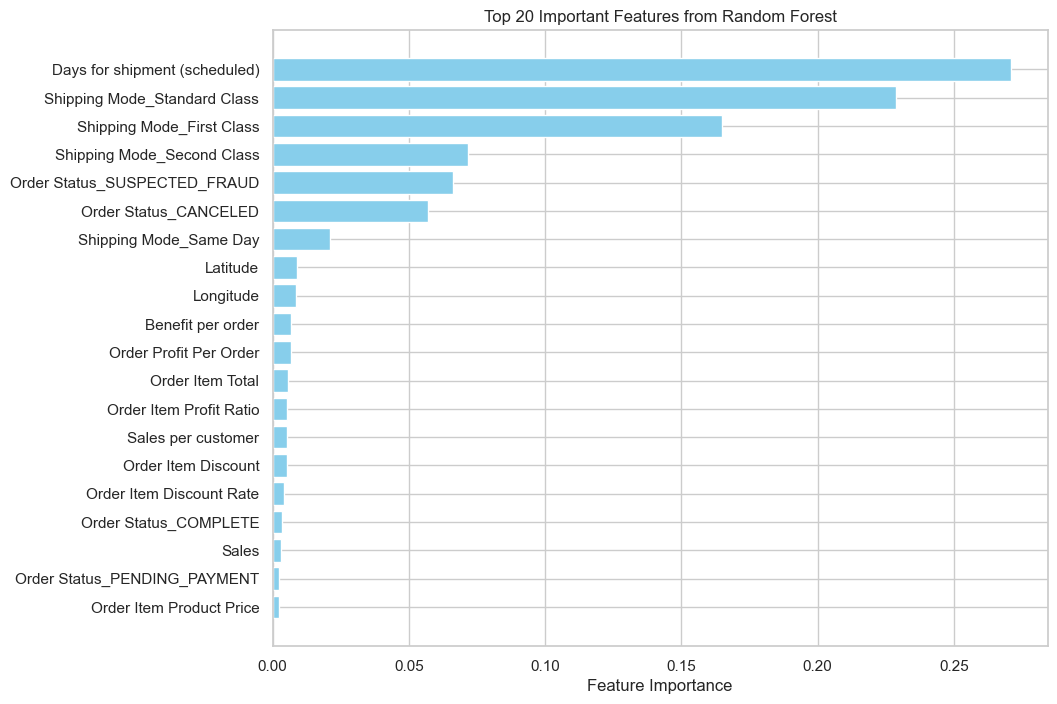

In [48]:
# Plot the top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(importance_data['Feature'].head(20), importance_data['Importance'].head(20), color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Function to map one-hot encoded features back to their original category names
def get_original_category(feature_name):
    if '_ohe_' in feature_name:
        col_name, index = feature_name.split('_ohe_h1_')
        index = int(index)

        # Mapping OneHotEncoder categories back to their original labels
        encoder = best_model.named_steps['preprocessor'].transformers_[0][1]
        original_labels = encoder.categories_[categorical_features_h1.index(col_name)]

        if index < len(original_labels):
            return original_labels[index]
        else:
            return "Unknown Category"
    return feature_name

# Apply the function to map feature names back to their original categories
importance_data['Original Category'] = importance_data['Feature'].apply(get_original_category)


##### Analysis
An AUC score above 0.8 generally indicates a good level of discrimination between classes, meaning the model performs well in distinguishing between late and non-late deliveries.
After performing 3-fold cross-validation, the AUC dropped slightly to 0.7823, which is still a solid result but suggests that the model might not generalize as well as initially indicated. This AUC score is still above the commonly accepted threshold of 0.75 for good model performance, but the decrease may suggest some overfitting during the initial training.


### 4. Hypothesis 2: Product and Operational Factors

"Certain product categories, order sizes, and discount rates significantly increase the risk of late deliveries, leading to potential customer dissatisfaction."

This hypothesis would help us to identify specific operational factors that directly influence late deliveries so the company can focus on business practices that can change to improve delivery efficiency.

##### Dynamic Feature Encoding

Here we apply StringIndexer and OneHotEncoder only when necessary, avoiding duplication. It then assembles the categorical and numerical features into a feature vector for the second model, stored in the features_h2 column.

In [49]:
print(df_cleaned.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Product Status', 'shipping date (DateOrders)',
       'Shipping Mode', 'Market_index', 'Shipping_Mode_index',
       'Price_per_item', 'D

In [50]:
# Create a list of categorical and numerical columns
categorical_features_h2 = ['Order Region', 'Order Country', 'Product Category Id', 'Order Status', 'Shipping Mode', 'Customer Segment', 'Market', 'Category Name']

numeric_features_h2 = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total', 'Order Item Discount Rate', 'Order Item Product Price', 'Benefit per order', 'Order Profit Per Order', 'Sales per customer', 'Order Item Profit Ratio', 'Product Price', 'Order Item Discount', 'Latitude', 'Longitude', 'Sales']

In [51]:
# Define preprocessing for the pipeline
preprocessor_h2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_h2),  # OneHotEncoder for categorical features
        ('num', StandardScaler(), numeric_features_h2)      # StandardScaler for numerical features
    ]
)

#### Feature Engineering Test

In [55]:
class TestFeatureEngineeringHypothesis2(unittest.TestCase):
    def setUp(self):
        # Sample data for testing, extended for Hypothesis 2 feature set
        self.df_cleaned = pd.DataFrame({
            'Order Region': ['APAC', 'EMEA', 'LATAM'],
            'Order Country': ['India', 'Germany', 'Brazil'],
            'Product Category Id': [1, 2, 3],
            'Customer Segment': ['Consumer', 'Corporate', 'Home Office'],
            'Order Status': ['Pending', 'Complete', 'Canceled'],
            'Shipping Mode': ['Standard Class', 'Second Class', 'First Class'],
            'Market': ['North America', 'Europe', 'South America'],
            'Category Name': ['Technology', 'Furniture', 'Office Supplies'],
            'Order Item Total': [1000, 1500, 1200],
            'Order Item Quantity': [10, 15, 12],
            'Order Item Discount Rate': [0.1, 0.15, 0.12],
            'Order Item Product Price': [100, 200, 150],
            'Benefit per order': [50, 100, 80],
            'Order Profit Per Order': [10, 20, 15],
            'Sales per customer': [300, 400, 350],
            'Order Item Profit Ratio': [0.05, 0.1, 0.08],
            'Product Price': [500, 800, 600],
            'Order Item Discount': [50, 60, 55],
            'Latitude': [37.7749, 48.8566, -22.9068],
            'Longitude': [-122.4194, 2.3522, -43.1729],
            'Sales': [1000, 1500, 1200],
            'Days for shipment (scheduled)': [5, 10, 15]
        })

        # Updated Hypothesis 2 feature engineering process using Hypothesis 1 feature lists
        self.categorical_features_h2 = ['Order Region', 'Order Country', 'Product Category Id', 'Order Status', 'Shipping Mode', 'Customer Segment', 'Market', 'Category Name']
        self.numeric_features_h2 = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total', 'Order Item Discount Rate', 'Order Item Product Price', 'Benefit per order', 'Order Profit Per Order', 'Sales per customer', 'Order Item Profit Ratio', 'Product Price', 'Order Item Discount', 'Latitude', 'Longitude', 'Sales']

        # Define the ColumnTransformer for preprocessing
        self.preprocessor_h2 = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_features_h2),  # OneHotEncoder for categorical features
                ('num', StandardScaler(), self.numeric_features_h2)  # StandardScaler for numerical features
            ]
        )

    def test_label_encoder(self):
        """Test if LabelEncoder works as expected"""
        label_encoder = LabelEncoder()
        expected_order_region_index = label_encoder.fit_transform(['APAC', 'EMEA', 'LATAM'])
        label_encoder.fit(self.df_cleaned['Order Region'])
        actual_order_region_index = label_encoder.transform(self.df_cleaned['Order Region'])
        self.assertTrue((actual_order_region_index == expected_order_region_index).all())

    def test_one_hot_encoding(self):
        """Test OneHotEncoder output and that it generates the expected number of columns"""
        # Fit the preprocessor to the data
        transformed = self.preprocessor_h2.fit_transform(self.df_cleaned)

        # Extract the OneHotEncoder part
        ohe_transformer = self.preprocessor_h2.named_transformers_['cat']
        ohe_features = ohe_transformer.get_feature_names_out(self.categorical_features_h2)

        # Test that one-hot encoding generated the expected number of columns
        expected_columns = sum([len(ohe_transformer.categories_[i]) for i in range(len(ohe_transformer.categories_))])
        self.assertEqual(len(ohe_features), expected_columns)

    def test_standard_scaler(self):
        """Test StandardScaler scaling of numeric columns"""
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.df_cleaned[self.numeric_features_h2])

        # Fit the preprocessor to get scaled numeric data
        preprocessed_data = self.preprocessor_h2.fit_transform(self.df_cleaned)

        # OneHotEncoded features appear first, numeric features come after them
        numeric_start_idx = self.preprocessor_h2.named_transformers_['cat'].get_feature_names_out(self.categorical_features_h2).shape[0]

        # Extract the scaled numeric data from the preprocessed output
        scaled_numeric_data_from_pipeline = preprocessed_data[:, numeric_start_idx:]

        # Ensure the scaled numeric data from the pipeline matches the manually scaled data
        for i in range(len(self.numeric_features_h2)):
            self.assertAlmostEqual(scaled_data[0, i], scaled_numeric_data_from_pipeline[0, i], places=6)
            self.assertAlmostEqual(scaled_data[1, i], scaled_numeric_data_from_pipeline[1, i], places=6)

# Run the test in Jupyter or Python

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...........
----------------------------------------------------------------------
Ran 11 tests in 0.075s

OK


##### Model training [7]

For this hypothesis we will be setting up and evaluating two machine learning models (Logistic Regression and Gradient Boosted Trees) to predict late delivery risks. Here we build separate pipelines for each model, and assessing the models using AUC (Area under the ROC Curve) to measure performance. 

In [57]:
# Models to be used: Logistic Regression and Gradient Boosted Trees
lr_2 = LogisticRegression(max_iter=500, solver='liblinear')
gbt_2 = GradientBoostingClassifier(n_estimators=100)


In [58]:
# Create pipelines for each model
pipeline_lr_h2 = Pipeline(steps=[('preprocessor', preprocessor_h2), ('classifier', lr_2)])
pipeline_gbt_h2 = Pipeline(steps=[('preprocessor', preprocessor_h2), ('classifier', gbt_2)])

In [62]:
# Split the data into training and testing sets
X_h2 = df_cleaned[categorical_features_h2 + numeric_features_h2]  # Use features defined for Hypothesis 2
y_h2 = df_cleaned['Late_delivery_risk']  # Assuming 'Late_delivery_risk' is your target

X_train_h2, X_test_h2, y_train_h2, y_test_h2 = train_test_split(X_h2, y_h2, test_size=0.3, random_state=42)


In [64]:
# Function to train and evaluate models [9]
def evaluate_model_h2(pipeline, X_train, X_test, y_train, y_test, model_name):
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} AUC: {auc}")
    return model


In [65]:
# Logistic Regression
lr_model_h2 = evaluate_model_h2(pipeline_lr_h2, X_train_h2, X_test_h2, y_train_h2, y_test_h2, "Logistic Regression")

# Gradient Boosted Trees
gbt_model_h2 = evaluate_model_h2(pipeline_gbt_h2, X_train_h2, X_test_h2, y_train_h2, y_test_h2, "Gradient Boosting Trees")

Logistic Regression AUC: 0.7705954080110942
Gradient Boosting Trees AUC: 0.7757794392312535


##### Logistic Regression Coefficients

Here we expect to understand not just the importance, but the direction of the relationship of the features and the Late Delivery Risk.

In [66]:
# Analyze coefficients from Logistic Regression model
lr_stage_h2 = lr_model_h2.named_steps['classifier']
coefficients_h2 = lr_stage_h2.coef_[0]
intercept_h2 = lr_stage_h2.intercept_[0]

In [67]:
# Get the feature names after OneHotEncoding and scaling
one_hot_encoded_feature_names_h2 = pipeline_lr_h2.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features_h2)
all_feature_names_h2 = np.hstack([one_hot_encoded_feature_names_h2, numeric_features_h2])


In [68]:
# Create DataFrame with feature names and coefficients
coefficient_data_h2 = pd.DataFrame({
    'Feature': all_feature_names_h2,
    'Coefficient': coefficients_h2
}).sort_values(by='Coefficient', ascending=False)

# Display top 20 coefficients for Logistic Regression
print("Top 20 Logistic Regression Coefficients (Hypothesis 2):")
print(coefficient_data_h2.head(20))


Top 20 Logistic Regression Coefficients (Hypothesis 2):
                                    Feature  Coefficient
245               Shipping Mode_First Class     4.400673
241                    Order Status_PENDING     2.380010
242            Order Status_PENDING_PAYMENT     2.355161
243                 Order Status_PROCESSING     2.342448
238                   Order Status_COMPLETE     2.341142
240             Order Status_PAYMENT_REVIEW     2.299847
237                     Order Status_CLOSED     2.296684
239                    Order Status_ON_HOLD     2.269935
105                      Order Country_Laos     1.161529
47                      Order Country_Bután     1.123974
110                Order Country_Luxemburgo     1.051794
71                    Order Country_Estonia     1.045152
182                    Order Country_Yibuti     1.030491
172              Order Country_Turkmenistán     0.816560
125                   Order Country_Namibia     0.682428
131                     Order Co

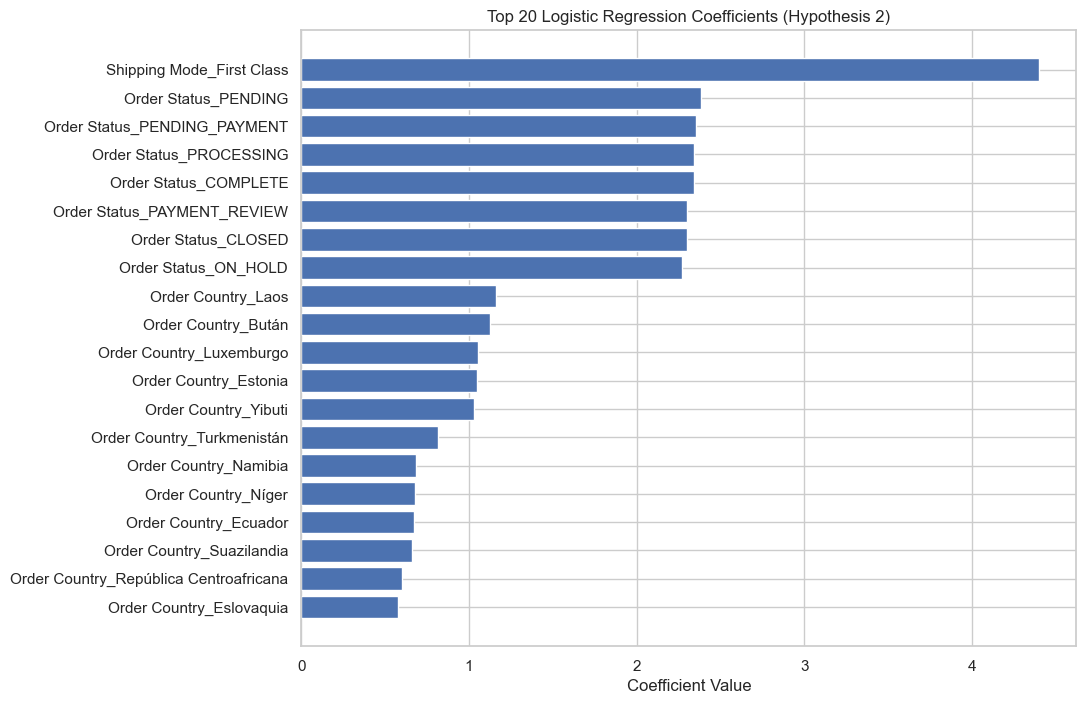

Intercept: -0.5139047080779096


In [69]:
# Plot the top 20 coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficient_data_h2['Feature'].head(20), coefficient_data_h2['Coefficient'].head(20))
plt.xlabel('Coefficient Value')
plt.title('Top 20 Logistic Regression Coefficients (Hypothesis 2)')
plt.gca().invert_yaxis()
plt.show()

# Print the intercept for Logistic Regression
print(f"Intercept: {intercept_h2}")

##### Analysis
The results support the idea that certain factors, particularly shipping mode, order statuses, and delivery country, significantly influence the risk of late deliveries. However, product categories and order sizes seem to play a less prominent role in late deliveries. 

### 5. Results and Comparison [10]

#### Hypothesis 1 Results: 
For this hypothesis we developed a Random Forest Model with several features related to shipping schedules, order details and delivery statuses to predict the likelihood of late deliveries, and we found the following:

- The initial model achieved an AUC of 0.802, indicating good model performance, but after performing 3-fold cross-validation, the AUC slightly dropped to 0.782, which is still a stron performance. What it shows us this decrease is that the model may slightly overfit during the initial training, but still generalizes well across different data folds.
- We found that the best parameters after the optimization using grid search were Max_depth:15, min_samples_split: 2 and n_estimators: 100, indicating a solid balance between performance and computation.
- For the feature importance we had valuable insights into the key drivers of late deliveries, starting with the Days of Shipment (scheduled) with an importance score of 0.2707, this feature was the most important driver of late deliveries. This aligns quite well with the hypothesis as better visibility into scheduled shipping times helps in predicting late deliveries.
- Shipping Mode_Standard Class (0.2288), Shipping Mode_First Class (0.1647), Shipping Mode_Second Class (0.0715), and Shipping Mode_Same Day (0.0212) are all important features. This shows that shipping method strongly influences the likelihood of late delivery. Standard Class, in particular, has a higher importance, likely because it has more variability in delivery performance.

The results from the model indeed provided a good support for the hypothesis, this given that with processes of supply chain visibility, particularly through features like Days for Shipment (scheduled) and Shipping Mode that are crucial in predicting late deliveries. Real-time analytics that improve visibility into these aspects can likely help reduce the frequency of late deliveries.
 



#### Hypothesis 2 Results:
We developed 2 models using Logistic Regression and Gradient Boosting Trees to predict the likelihood of late deliveries based on various product and order-related features. With these we found the following insights:

- With the Logistic Regression we achieved an AUC of 0.7706, indicating that it performs well in predicting whether deliveries will be late based on the features. This AUC in this range suggests the model has good discriminatory power, but there's still room for improvement.
- With the Gradient Boosting Trees model we achieved a slightly higher AUC of 0.7758, suggesting that it captures non-linear relationships between the features and the targe variable better than the Logistic Regression.
- For the Feature importance we calculated the Logistic Regression Coefficients that gives is insights into how each feature impacts the risk of late deliveries. most of the coefficients were positive indicating an increase on the risk.
- The shipping mode First Class has the highest positive coefficient, indicating that First Class Shipping significantly increases the risk of late deliveries. This is interesting since First Class Shipping is often expected to be faster, but operational inefficiencies in this shipping mode may lead to delays.
- Order Status class "Pending", "Pending Payment", "Processing" and Complete all have high positive coefficients. These statuses likely represent orders that are in various stages of processing, with potential administrative or operative bottlenecks contributing to late deliveries.

With this models we could gather insights into the factors contributing to late deliveries, though they indicate that features such as product categories, order sizes, and discount rates are not the primary factors driving late deliveries. Instead the models highlight the importance of shipping modes, order statuses and the delivery countries as the most influential features.

### 6. Conclusion

The entire analysis demonstrated that the late deliveries are primarily driven by complex, non-linear interactions between features such as the shipping mode, the order status, and geographical factors.While individual feature correlations with late delivery risk were weak, their combination in machine learning models significantly boosted predictive performance, so that's why models like Random Forest and Gradient Boosting were effective in capturing these interactions, achieving AUC scores of up to 0.78.

For the company is important to understand that the predictive power of the models comes from capturing the joint effects of multiple features rather than relying on individual correlations. For example, a high order quantity combined with a short shipping window might increase the likelihood of late deliveries, so using analytics entirely focused on individual features won't help the company achieve a higher customer satisfaction scores.

#### Actionable Insights:

1. Optimize Shipping and Processing for High-Risk Categories: Focus on improving the logistics for categories like Golf bags, lacrosse and pet Supplies to reduce the risk of late delivery. Initiatives that reward the fast processing in logistic centers could be beneficial for the logistic operator.
2. The company needs to address the logistical bottlenecks in regions like Latin America, where cities such as Santo Domingo and Tegucigalpa are more prone to delivery delays. Partnering with reliable local logistics providers could help alleviate these issues.
3. Reduce delays related to pending orders or processing statuses by enhancing internal operations. Streamlining these processes will directly reduce late deliveries, as shown by the high importance of these features in the models.

#### Next Steps:

1. Develop additional interaction features between shipping modes and regional factors to further improve model accuracy. Capturing these complex interactions can significantly enhance predictive power.
2. Implement real-time analytics for order processing and shipment tracking to provide early warnings for potential delays, allowing for proactive interventions. This will address key drivers highlighted in Hypothesis 1.
3. Ensure that future models continue to generalize well by conducting thorough cross-validation. This will prevent overfitting and ensure consistent performance across different data splits.
4. Continuously monitor and refine the performance of Standard Class and First Class shipping, as well as Order Status processing. These features are critical across both hypotheses and offer significant areas for operational improvement.


## References

1. Han, J., Kamber, M., & Pei, J. (2011). *Data Mining: Concepts and Techniques*. Morgan Kaufmann.
2. McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. O'Reilly Media.
3. Little, R.J.A., & Rubin, D.B. (2019). *Statistical Analysis with Missing Data*. Wiley.
4. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.
5. Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection: A Practical Approach for Predictive Models*. CRC Press.
6. Breiman, L. (2001). Random forests. *Machine Learning*, 45(1), 5-32.
7. Friedman, J. H. (2002). Stochastic gradient boosting. *Computational Statistics & Data Analysis*, 38(4), 367-378.
8. Fawcett, T. (2006). An introduction to ROC analysis. *Pattern Recognition Letters*, 27(8), 861-874.
9. Powers, D. M. W. (2011). Evaluation: from precision, recall, and F-measure to ROC, informedness, markedness, and correlation. *Journal of Machine Learning Technologies*, 2(1), 37-63.
10. Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*. MIT Press.